In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import torch
from glob import glob
import pandas as pd

In [2]:
from torchvision import datasets, transforms

In [10]:
mnist_train = datasets.MNIST(root = 'data', train=True, download=True, transform=transforms.ToTensor())

mnist_test = datasets.MNIST(root= 'data', train=False, download=True,transform = transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(mnist_train)

test_loader = torch.utils.data.DataLoader(mnist_test)

mnist_test

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

tensor([5])
targets tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0])
tensor([0])
targets tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0])
tensor([4])
targets tensor([0, 0, 0, 0, 1, 0, 0, 0, 0, 0])
tensor([1])
targets tensor([0, 1, 0, 0, 0, 0, 0, 0, 0, 0])


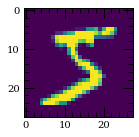

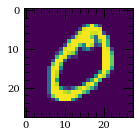

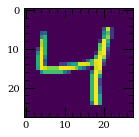

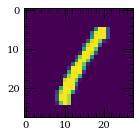

In [23]:
ii = 0
for data, targets in train_loader:
    if ii<4:
        target_dig = targets
        targets = torch.zeros(10, dtype=torch.long)
        print(target_dig)
        targets[target_dig] = 1
        print("targets", targets)
        #         print(targets)
        fig, axes = plt.subplots(figsize=(2,2))
        axes.imshow(data[0][0])
    else:
        break
    ii+=1

In [13]:
filenames = glob("/Users/sasha/Google Drive/Studying/Fall2020/AMTH553/Assignment 3/code/2_performance_tables/*accuracy.csv")
filenames

['/Users/sasha/Google Drive/Studying/Fall2020/AMTH553/Assignment 3/code/2_performance_tables/2_3_linear_two_layer_dataframe_accuracy.csv',
 '/Users/sasha/Google Drive/Studying/Fall2020/AMTH553/Assignment 3/code/2_performance_tables/2_3_ELU_dataframe_accuracy.csv',
 '/Users/sasha/Google Drive/Studying/Fall2020/AMTH553/Assignment 3/code/2_performance_tables/2_3_sigmoid_between_hidden_layers_lr_0.005_dataframe_accuracy.csv',
 '/Users/sasha/Google Drive/Studying/Fall2020/AMTH553/Assignment 3/code/2_performance_tables/2_3_tanh_dataframe_accuracy.csv',
 '/Users/sasha/Google Drive/Studying/Fall2020/AMTH553/Assignment 3/code/2_performance_tables/2_3_sigmoid_after_2_layers_dataframe_accuracy.csv',
 '/Users/sasha/Google Drive/Studying/Fall2020/AMTH553/Assignment 3/code/2_performance_tables/2_3_5_layer_ELU_dataframe_accuracy.csv',
 '/Users/sasha/Google Drive/Studying/Fall2020/AMTH553/Assignment 3/code/2_performance_tables/2_3_ReLU__lr_0.005_dataframe_accuracy.csv',
 '/Users/sasha/Google Drive/Stu

In [14]:
var_names = [
    '2.3 Linear 2-layer',
    'ELU',
    'Sigmoid between hidden layers',
    'tanh',
    "Sigmoid after second layer",
    "5-layer with ELU",
    'ReLU',
    "3-layer with ELU only",
    "3-layer with ELU and sigmoid",
    "4-layer with ELU",
             '2.2']



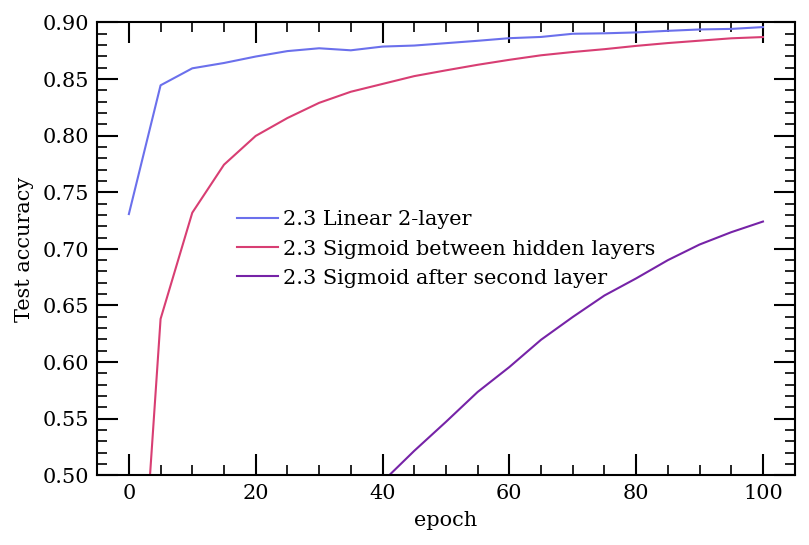

In [270]:
fig, axes = plt.subplots(figsize=(6,4), dpi=150)
for ii, file in enumerate(filenames):
    if ii in [0,3,5]:
        dataframe = pd.read_csv(file)
        axes.plot(dataframe['epoch'].values, dataframe['Test accuracy'].values, label=var_names[ii])
axes.legend(loc='center')
axes.set(xlabel='epoch', ylabel='Test accuracy', ylim=(0.5, 0.9))
plt.savefig("accuracies_2_3_linear_and_between_layers.png", bbox_inches="tight", pad_inches=0.01)

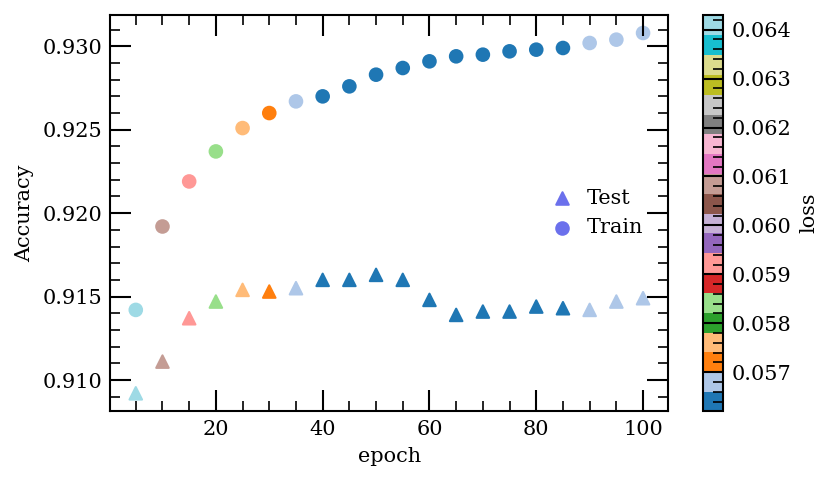

In [263]:
fig, axes = plt.subplots(figsize=(6,3.5), dpi=150)
for ii, file in enumerate(filenames):
    if ii==7:
        dataframe = pd.read_csv(file)
        test = axes.scatter(dataframe['epoch'].values[1:], dataframe['Test accuracy'].values[1:], label="Test", marker='^', c=dataframe['Loss'].values[1:], cmap='tab20')
        axes.scatter(dataframe['epoch'].values[1:], dataframe['Train accuracy'].values[1:], label="Train", marker='o', c=dataframe['Loss'].values[1:], cmap='tab20')
axes.legend(loc='center right')
cbar = plt.colorbar(test)
cbar.ax.set_ylabel("loss")
axes.set(xlabel='epoch', ylabel='Accuracy')
plt.savefig("accuracies_2_2.png", bbox_inches="tight", pad_inches=0.01)

In [250]:
ls -ltrh

total 3096
-rw-r--r--@  1 sasha  staff   227K Nov  9 10:40 CPSC453_PS3.pdf
drwxr-xr-x@  6 sasha  staff   192B Nov 30 12:30 data/
-rw-r--r--   1 sasha  staff    38K Dec  2 15:32 accuracies_2_3_sigmoid_thicknesses_test.png
-rw-r--r--   1 sasha  staff   132K Dec  2 16:24 confusion_matrix.png
drwxr-xr-x   8 sasha  staff   256B Dec  3 09:20 amth_ps3_include/
-rw-r--r--   1 sasha  staff   779B Dec  3 09:20 safonova_sasha_ps3_report.aux
-rw-r--r--   1 sasha  staff   1.1K Dec  3 09:20 safonova_sasha_ps3_report.out
-rw-r--r--   1 sasha  staff   1.1K Dec  3 09:20 safonova_sasha_ps3_report.toc
-rw-r--r--   1 sasha  staff   377K Dec  3 09:20 safonova_sasha_ps3_report.pdf
-rw-r--r--   1 sasha  staff    33K Dec  3 09:20 safonova_sasha_ps3_report.synctex.gz
-rw-r--r--   1 sasha  staff    21K Dec  3 09:20 safonova_sasha_ps3_report.log
-rw-r--r--@  1 sasha  staff   973B Dec  3 09:20 safonova_sasha_ps3_report.tex
-rw-r--r--   1 sasha  staff    56K Dec  3 11:03 accuracies_2_3_alternative_activation_fns.p

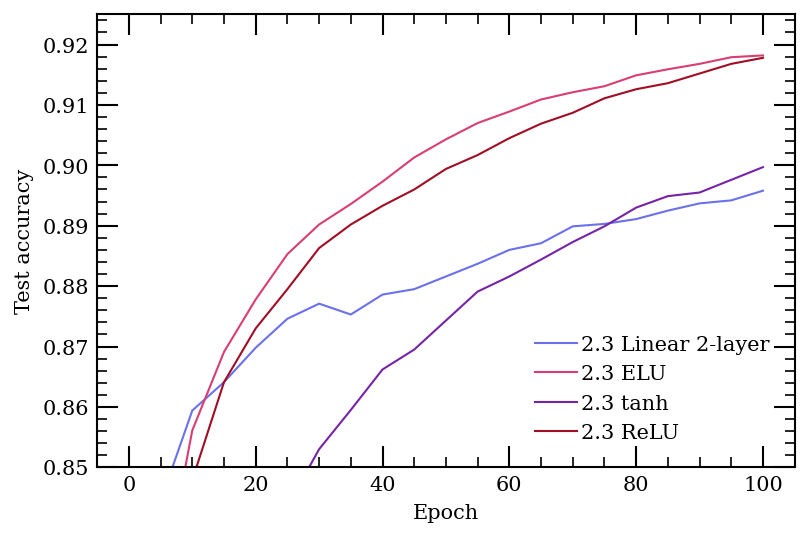

In [212]:
fig, axes = plt.subplots(figsize=(6,4), dpi=150)
for ii, file in enumerate(filenames):
    if ii in [0,1, 4, 6]:
        dataframe = pd.read_csv(file)
        axes.plot(dataframe['epoch'].values, dataframe['Test accuracy'].values, label=var_names[ii])
axes.legend(loc='lower right')
axes.set(xlabel='Epoch', ylabel='Test accuracy', ylim=(0.85, 0.925))
plt.savefig("accuracies_2_3_alternative_activation_fns.png", bbox_inches="tight", pad_inches=0.01)

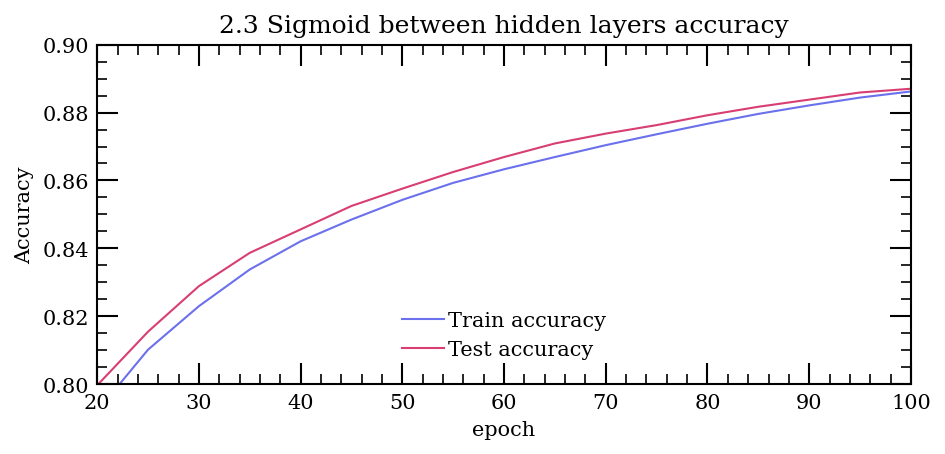

In [283]:
fig, axes = plt.subplots(figsize=(7,3), dpi=150)
for ii, file in enumerate(filenames):
    if ii in [2]:
        dataframe = pd.read_csv(file)
        axes.plot(dataframe['epoch'].values, dataframe['Train accuracy'].values, label="Train accuracy".format(var_names[ii]))
        axes.plot(dataframe['epoch'].values, dataframe['Test accuracy'].values, label="Test accuracy")
        axes.set_title("{0} accuracy".format(var_names[ii]))
        break
axes.legend(loc='lower center')
axes.set(xlabel='epoch', ylabel='Accuracy', ylim=(.8, 0.9), xlim=(20, 100))

plt.savefig("accuracies_2_3_sigmoid_test_train.png", bbox_inches="tight", pad_inches=0.01)

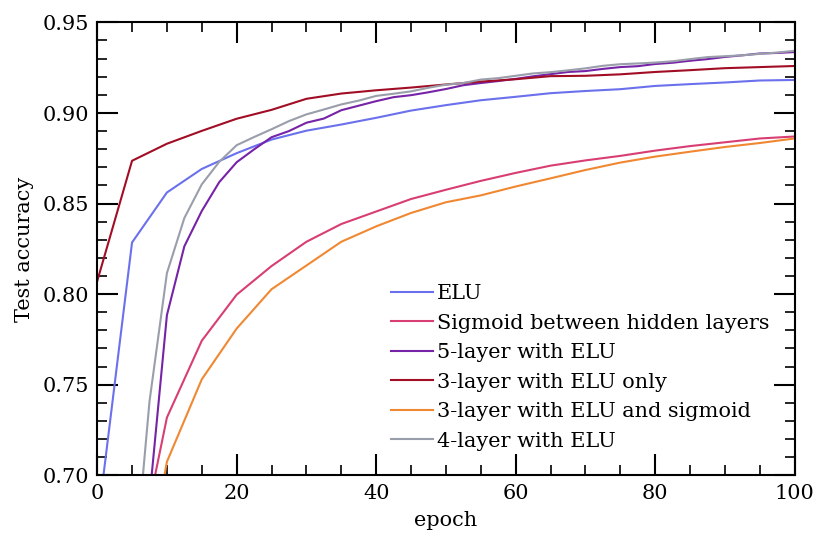

In [21]:
fig, axes = plt.subplots(figsize=(6,4), dpi=150)
for ii, file in enumerate(filenames):
    if ii in [1, 2, 5,  7, 8, 9]:
        dataframe = pd.read_csv(file)
        if ii in [9, 5]:
            axes.plot(dataframe['epoch'].values/2, dataframe['Test accuracy'].values, label=var_names[ii])
        else:
            axes.plot(dataframe['epoch'].values, dataframe['Test accuracy'].values, label=var_names[ii])
axes.legend(loc='lower right')
axes.set(xlabel='epoch', ylabel='Test accuracy', ylim=(0.7, 0.95), xlim=(0, 100))
plt.savefig("accuracies_2_3_sigmoid_thicknesses_test.png", bbox_inches="tight", pad_inches=0.01)

In [291]:
confusion = pd.read_csv("/Users/sasha/Google Drive/Studying/Fall2020/AMTH553/Assignment 3/code/2_3_sigmoid_dataframe_confusion.csv")
confusion

,Unnamed: 0,Correct digit,Mislabeled digit
0,0,"[5, 3, 4, 1, 5, 2, 9, 2, 3, 7, 3, 2, 9, 1, 3, ...","[6, 9, 6, 9, 0, 0, 7, 7, 5, 9, 7, 9, 3, 7, 5, ..."
1,1,"[5, 1, 9, 9, 2, 1, 7, 9, 3, 2, 9, 4, 5, 9, 4, ...","[6, 3, 8, 7, 7, 9, 9, 4, 7, 4, 3, 9, 3, 4, 7, ..."
2,2,"[5, 9, 4, 2, 9, 2, 8, 4, 7, 2, 9, 9, 9, 6, 3, ...","[6, 4, 0, 3, 4, 7, 5, 2, 9, 4, 3, 7, 4, 3, 5, ..."
3,3,"[5, 4, 2, 9, 2, 4, 7, 2, 9, 7, 6, 8, 9, 7, 2, ...","[6, 0, 1, 4, 7, 6, 4, 9, 8, 3, 5, 3, 5, 3, 7, ..."
4,4,"[5, 4, 7, 3, 4, 3, 9, 9, 9, 6, 9, 4, 1, 7, 8, ...","[6, 0, 2, 5, 2, 1, 2, 4, 8, 5, 5, 2, 5, 9, 1, ..."
5,5,"[5, 4, 7, 8, 2, 4, 7, 4, 2, 9, 9, 6, 9, 3, 4, ...","[6, 0, 2, 2, 7, 6, 4, 2, 8, 8, 8, 5, 8, 5, 2, ..."
6,6,"[5, 4, 2, 7, 0, 2, 9, 9, 8, 9, 3, 4, 8, 9, 6, ...","[6, 0, 7, 4, 5, 9, 3, 4, 3, 3, 5, 2, 1, 3, 5, ..."
7,7,"[5, 4, 9, 2, 7, 3, 2, 6, 9, 4, 8, 9, 2, 9, 2, ...","[6, 0, 4, 7, 4, 1, 9, 5, 8, 2, 1, 3, 3, 7, 7, ..."
8,8,"[5, 4, 7, 9, 6, 2, 9, 3, 2, 9, 7, 9, 3, 3, 9, ...","[6, 0, 2, 4, 7, 7, 4, 1, 9, 8, 3, 4, 2, 5, 5, ..."
9,9,"[5, 6, 4, 7, 6, 2, 7, 4, 7, 2, 9, 4, 9, 3, 9, ...","[4, 5, 0, 2, 2, 7, 2, 9, 2, 9, 4, 9, 7, 2, 5, ..."


In [292]:
correct = confusion['Correct digit']
correct = eval(correct[20])

In [293]:
mislabel = confusion['Mislabeled digit']
mislabel = eval(mislabel[20])

In [294]:
confusion_matrix = np.zeros((10,10))
for ii, corr in enumerate(correct):
    confusion_matrix[corr, mislabel[ii]] +=1

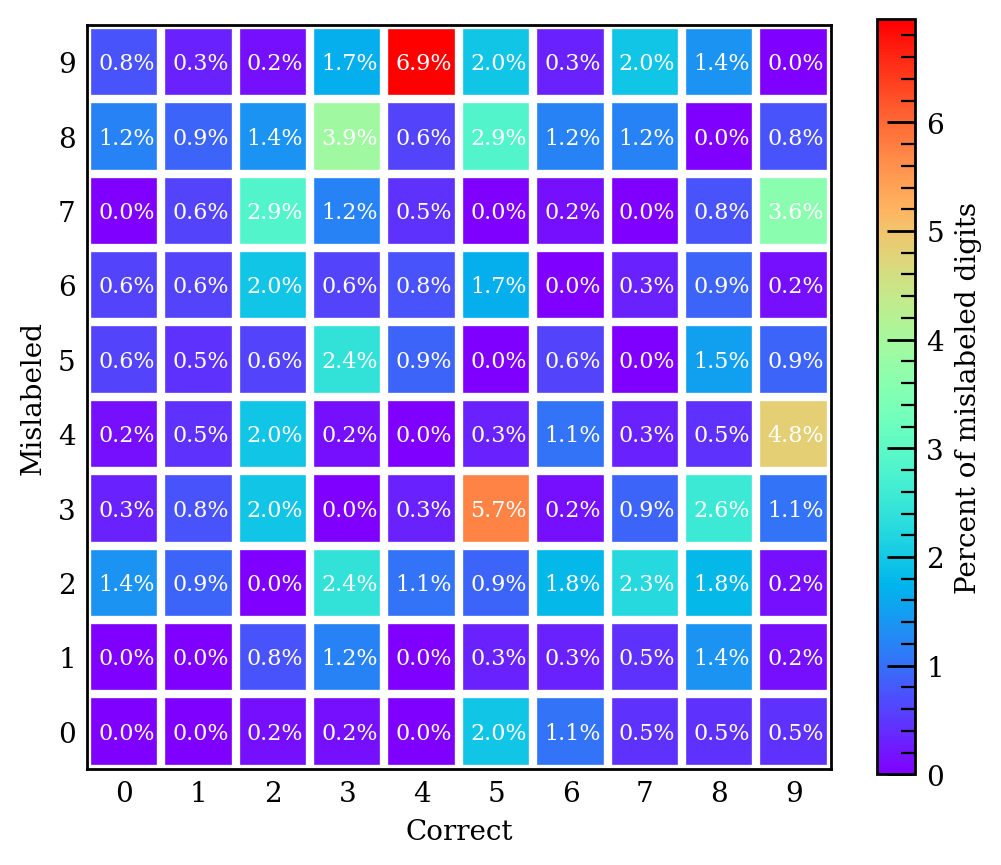

In [295]:
fig, axes = plt.subplots(figsize=(6,5),dpi=200)
mx = axes.imshow(100*confusion_matrix/len(correct), cmap='rainbow', origin='lower')
cbar = plt.colorbar(mx)
axes.set(xlabel='Correct', ylabel='Mislabeled')
cbar.ax.set_ylabel("Percent of mislabeled digits")
for ii in range(10):
    for jj in range(10):
        axes.text(ii-0.35, jj-0.1, "{0:0.1f}%".format(100*confusion_matrix[jj][ii]/len(correct)), c='w', fontsize=8)
axes.set_xticks(np.arange(confusion_matrix.shape[1]+1)-.5, minor=True)
axes.set_yticks(np.arange(confusion_matrix.shape[0]+1)-.5, minor=True)
axes.grid(which="minor", color="w", linestyle='-', linewidth=3)
axes.tick_params(which="both", bottom=False, left=False, top=False, right=False)
axes.set_xticks(np.arange(10))
axes.set_xticklabels(np.arange(10))
axes.set_yticks(np.arange(10))
axes.set_yticklabels(np.arange(10))
plt.savefig("sigmoid_confusion_matrix.png", bbox_inches='tight' , pad_inches=0.01);

